# **CAR PRICE ANALYSIS**

## Objectives

* The purpose of this notebook is to explore and visualise the prepared dataset in order to identify trends, paterns and relationships within the data.
*The visualisation steps are planned as follows:
- Continue examinations of the data
- Create charts to visualise trenda, dependencies, comparisons
- Interpretation of the the findings

## Inputs

* The input file for this notebook is cars_clean.csv

## Outputs

* Data visualisation notebook, presenting plots and statistics

## Additional Comments

* No additional comments. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'd:\\vscode-projects\\Projects\\Car_price_analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'd:\\vscode-projects\\Projects\\Car_price_analysis'

# Setup

- Environment setup/Importing necessary libraries:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


- Initial data visualisation

In [5]:
df = pd.read_csv('D:/vscode-projects/test/cars_cleaned.csv') 
df.head(5)

,car_id,symboling,fuel_type,aspiration,door_number,car_body,drive_wheel,engine_location,wheel_base,car_length,...,bore_ratio,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highwaympg,price,brand,model
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa romeo,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa romeo,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa romeo,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


- Basic descriptive statistics 

In [ ]:
print(df.describe().T)

## Overall price landscape

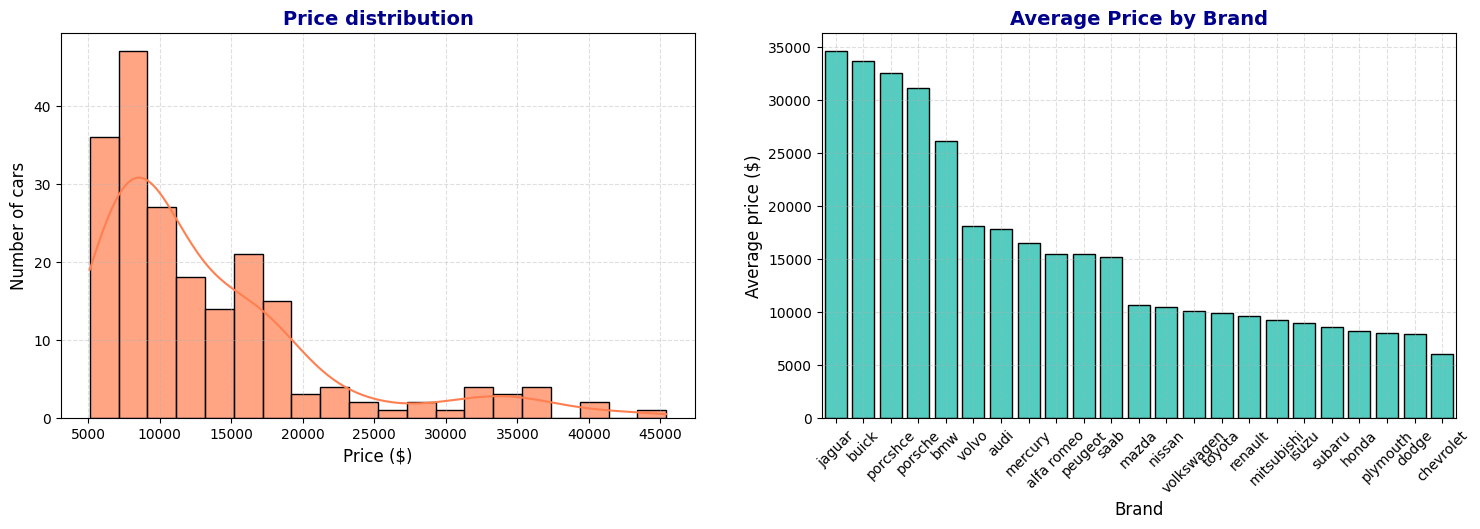

In [ ]:
#Price distribution
# Shows car price distribution, revealing right skew with most cars priced between $10k and $30k.

fig, axes = plt.subplots(1, 2, figsize=(18, 5)) # 1 row, 2 columns

sns.histplot(df['price'], bins=20, kde=True, color='coral', edgecolor='black', alpha=0.7, ax=axes[0])
axes[0].set_title("Price distribution", color='darkblue', fontsize=14, fontweight='bold')
axes[0].set_xlabel("Price ($)", fontsize=12)
axes[0].set_ylabel("Number of cars", fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)


# Brand Influence
# Displays average price by brand, highlighting premium brands like Jaguar, Buick, and Porsche with higher prices.
avg_price_brand = df.groupby('brand')['price'].mean().sort_values(ascending=False)

sns.barplot(x=avg_price_brand.index, y=avg_price_brand.values, edgecolor='black', color='turquoise', ax=axes[1])
axes[1].set_title("Average Price by Brand", color='darkblue', fontsize=14, fontweight='bold')
axes[1].set_xlabel("Brand", fontsize=12)
axes[1].set_ylabel("Average price ($)", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.4)



# Price variations

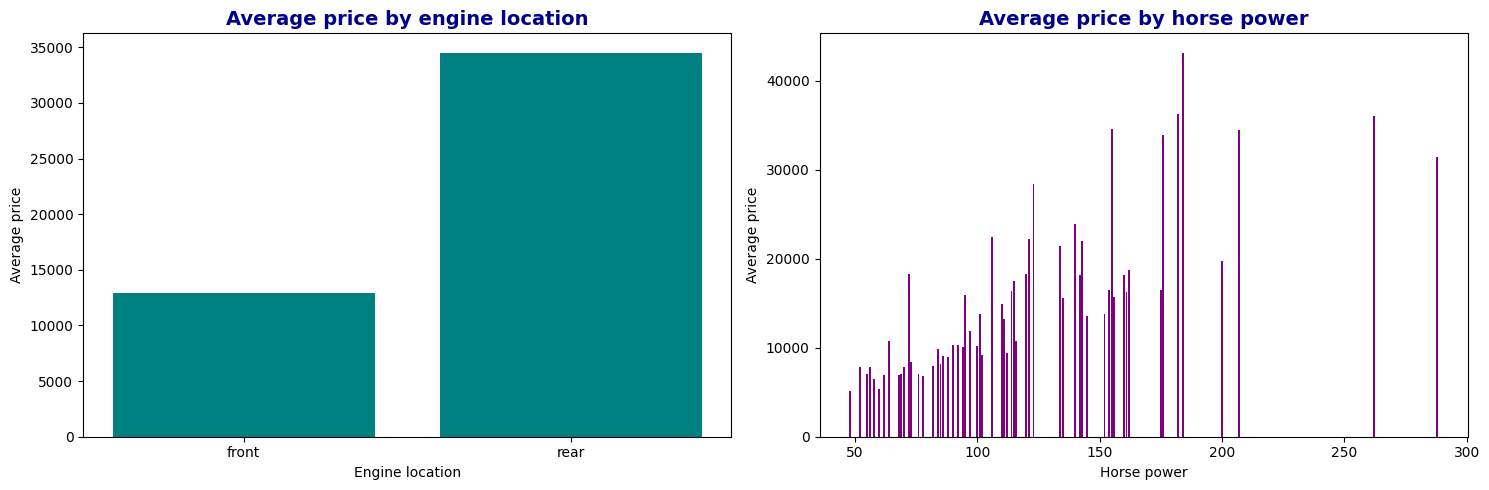

In [ ]:
# Average price by engine Location
# Shows price differences; rear-engine cars tend to be pricier, suggesting a premium segment.

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
avg_price_loc = df.groupby('engine_location')['price'].mean()
plt.bar(avg_price_loc.index, avg_price_loc.values, color='teal')
plt.title('Average price by engine location', color='darkblue', fontsize=14, fontweight='bold')
plt.xlabel('Engine location')
plt.ylabel('Average price')

# Average price by horsepower
# Higher horsepower cars generally have higher prices, reflecting a performance premium.

plt.subplot(1, 2, 2)
avg_price_hp = df.groupby('horse_power')['price'].mean()
plt.bar(avg_price_hp.index, avg_price_hp.values, color='purple')
plt.title('Average price by horse power', color='darkblue', fontsize=14, fontweight='bold')
plt.xlabel('Horse power')
plt.ylabel('Average price')


plt.tight_layout()
plt.show()


## Correlation analysis

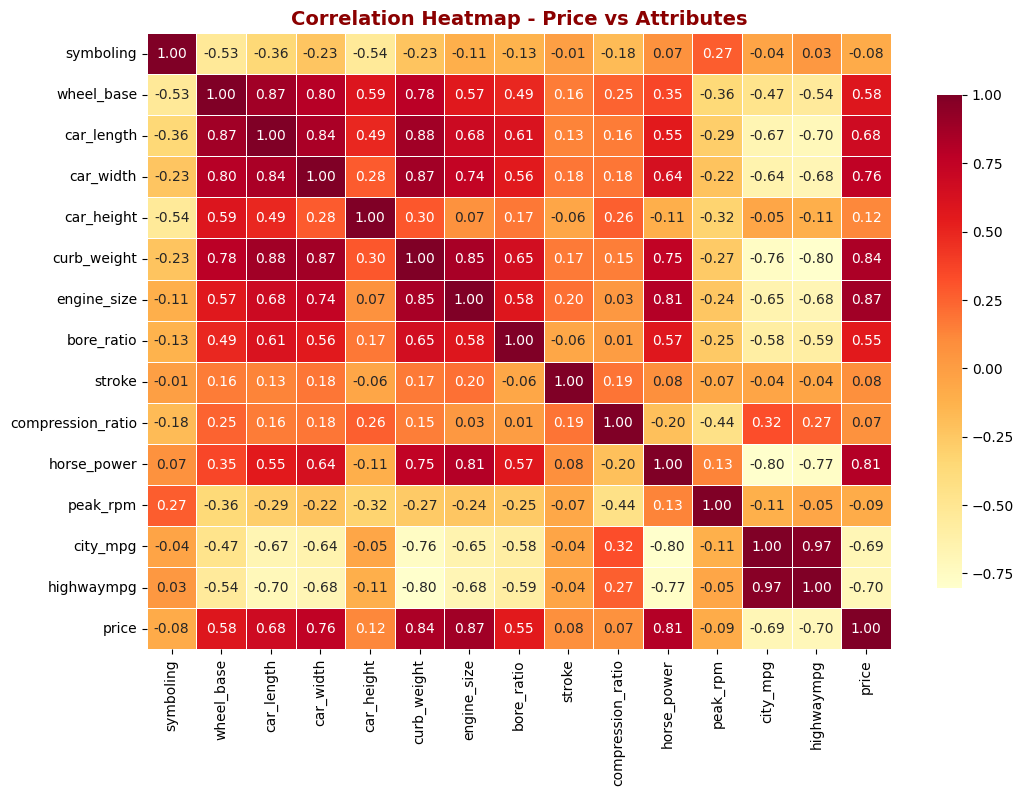

In [ ]:
# Correlation heatmap
# Displays correlations between numerical features, highlighting strong positive links of price with horsepower and engine size.

# Select numerical columns for correlation analysis
numerical_columns = df[['symboling', 'wheel_base', 'car_length', 'car_width', 'car_height', 
                        'curb_weight', 'engine_size', 'bore_ratio', 'stroke', 'compression_ratio', 
                        'horse_power', 'peak_rpm', 'city_mpg', 'highwaympg', 'price']]

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='YlOrRd', 
    fmt='.2f', 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap - Price vs Attributes", color='darkred', fontsize=14, fontweight='bold')
plt.show()

The correlation heatmap shows that car price is strongly positively correlated with features like engine size, horsepower, curb weight, and car dimensions—indicating that larger, more powerful, and heavier cars tend to be more expensive. Conversely, fuel efficiency metrics (city and highway MPG) have a strong negative correlation with price, meaning more fuel-efficient cars are generally cheaper. Other features like car height and peak RPM show weak or no clear correlation with price.

## Feature impact on price

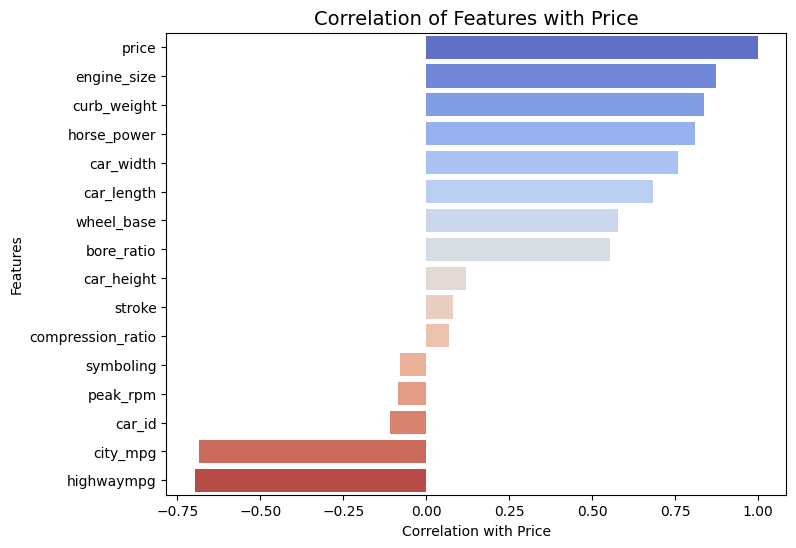

In [ ]:
# Correlation analysis for pricing insights
# Identifies features strongly linked to price, guiding which to reduce to lower cost.
               
corr = df.corr(numeric_only=True)['price'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=corr.values, y=corr.index, hue=corr.index, palette="coolwarm", legend=False)
plt.title("Correlation of Features with Price", fontsize=14)
plt.xlabel("Correlation with Price")
plt.ylabel("Features")
plt.show()

Key findings:
- Larger engines, heavier weight, and higher horsepower increase price.
- Features like car height and peak RPM show weak correlation.
- City and highway MPG negatively correlate, meaning more efficient cars tend to be cheaper.

## Fuel type and price distribution

In [ ]:
# Price distribution by fuel type
# Shows how car prices vary across fuel types, indicating distinct market segments.

fig_violin = px.violin(
    df,
    x='fuel_type',
    y='price',
    color='fuel_type',
    color_discrete_map={
        'gas': 'orchid',      
        'diesel': 'indigo'  
    },
    box=True,
    points='all',
    title="Price distribution by fuel type"
)
fig_violin.show()


The price distribution by fuel type reveals clear differences, showing that fuel type influences pricing and reflects distinct market segments, with some fuel types generally associated with higher-priced vehicles than others.

## Predictive Feature Relationships

In [ ]:
# Multivariate bubble plot
# Visualizes how curb weight, horsepower, and highway MPG together relate to car price.
# Heavier, powerful, low-MPG cars tend to be pricier; lighter, efficient cars cost less.


fig = px.scatter(df,
                 x='curb_weight',
                 y='price',
                 size='horse_power',
                 color='highwaympg',
                 hover_data=['brand', 'model', 'engine_size'],
                 title='Multivariate Bubble Chart: Curb Weight, Horsepower, Highway MPG vs Price',
                 labels={
                     'curb_weight': 'Curb Weight',
                     'price': 'Price ($)',
                     'horse_power': 'Horse Power',
                     'highwaympg': 'Highway MPG'
                 },
                 color_continuous_scale='Viridis')

fig.update_layout(showlegend=True)
fig.show()


Observation shows that cars with greater weight and horsepower are more expensive but less fuel-efficient, whereas lighter, fuel-efficient models are typically more affordable.

## Price Hierarchy by Brand and Model

In [ ]:
# Sunburst Plot: Price Hierarchy by Brand, Model, and Fuel Type
# Shows how average prices vary across brands and models, highlighting premium segments.

avg_price_df = df.groupby(['brand', 'model', 'fuel_type'])['price'].mean().reset_index()

fig = px.sunburst(
    avg_price_df,
    path=['brand', 'model', 'fuel_type'],  # hierarchy levels
    values='price',                        # size by average price
    color='price',                        # color by price (continuous)
    color_continuous_scale='Viridis',
    title='Average Car Price Hierarchy: Brand → Model → Fuel Type'
)

fig.update_layout(
    width=900,
    height=900,
    margin=dict(t=50, l=0, r=0, b=0)
)

fig.update_traces(maxdepth=2)  # Zoom in to show only brand and model initially

fig.show()


The sunburst plot reveals clear price segmentation in the market: certain brands and models, especially in premium fuel-type categories, command noticeably higher average prices, while others cluster in more affordable segments. This highlights how brand reputation, model positioning, and fuel type together shape vehicle pricing tiers.

## Final conclusion

The analysis confirms that car prices are right-skewed, with most vehicles priced in the mid-range and fewer high-end outliers. Brand significantly affects pricing, with premium brands commanding higher averages.

Key features like engine size, horsepower, and curb weight are strongly linked to higher prices, while fuel-efficient cars tend to cost less. Multivariate and hierarchical visualizations further highlight how these attributes interact across brand, model, and fuel type.

These insights validate the hypotheses and offer a strong basis for pricing decisions and future predictive modeling.

NOTE

* All required python packages (pandas, numpy,seaborn,matplotlib)  must be installed before running this notebook
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go  back to a previous cell and refresh a variable content)
* This analysis focus is to visualize data to support or challenge project hypotheses.
* Please refer to README file for more information

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [11]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)